In [ ]:
# ## this is for mode 1 option 2 (optional for selecting environment 1)
# ## no need to run this cell. just go with option 1
from google.colab import files
uploaded = files.upload()


	"1" for using file input mode.
	"2" for manual input using terminal mode.
		Select: 1

	"1" for colab environment.
	"2" for any environment.
		Select environment: 1


Saving input.txt to input (8).txt


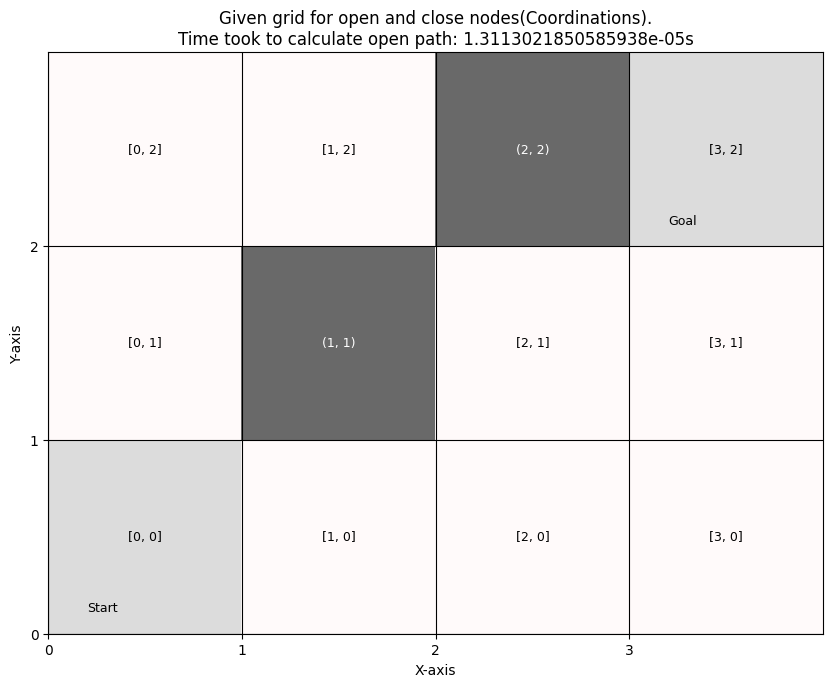


Path cost: 
{'0,0': [['0,1', 1.0], ['1,0', 1.0]], '1,0': [['0,0', 1.0], ['0,1', 1.4], ['2,0', 1.0], ['2,1', 1.4]], '2,0': [['1,0', 1.0], ['2,1', 1.0], ['3,0', 1.0], ['3,1', 1.4]], '3,0': [['2,0', 1.0], ['2,1', 1.4], ['3,1', 1.0]], '0,1': [['0,0', 1.0], ['0,2', 1.0], ['1,0', 1.4], ['1,2', 1.4]], '2,1': [['1,0', 1.4], ['1,2', 1.4], ['2,0', 1.0], ['3,0', 1.4], ['3,1', 1.0], ['3,2', 1.4]], '3,1': [['2,0', 1.4], ['2,1', 1.0], ['3,0', 1.0], ['3,2', 1.0]], '0,2': [['0,1', 1.0], ['1,2', 1.0]], '1,2': [['0,1', 1.4], ['0,2', 1.0], ['2,1', 1.4]], '3,2': [['2,1', 1.4], ['3,1', 1.0]]}




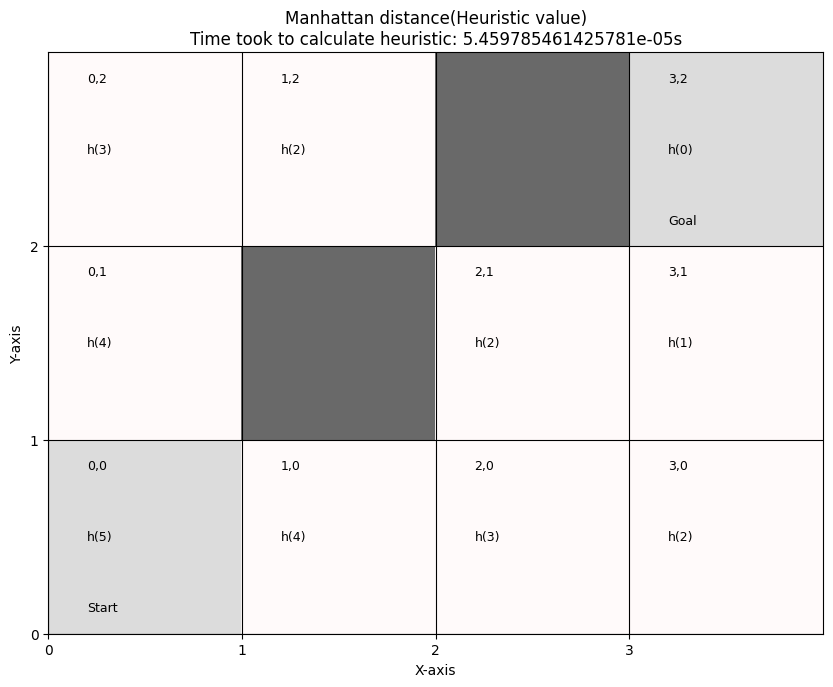

Path found: 0,0>1,0>2,1>3,2 in 8.368492126464844e-05s


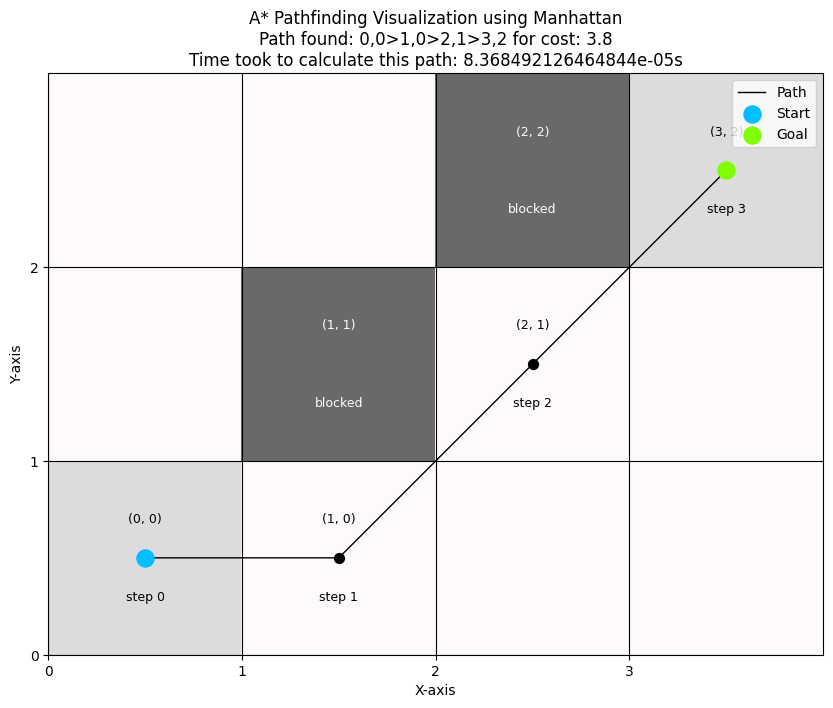

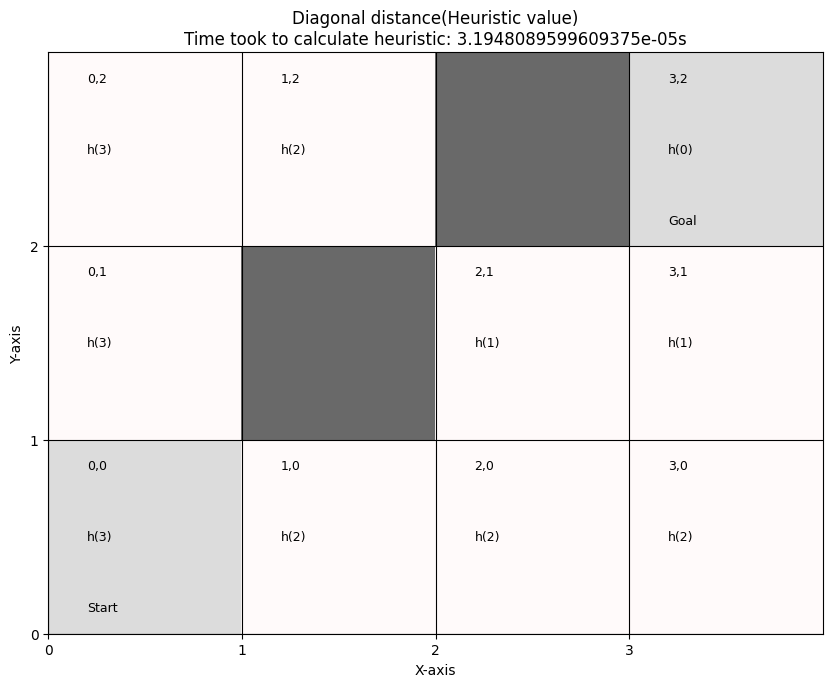

Path found: 0,0>1,0>2,1>3,2 in 5.9604644775390625e-05s


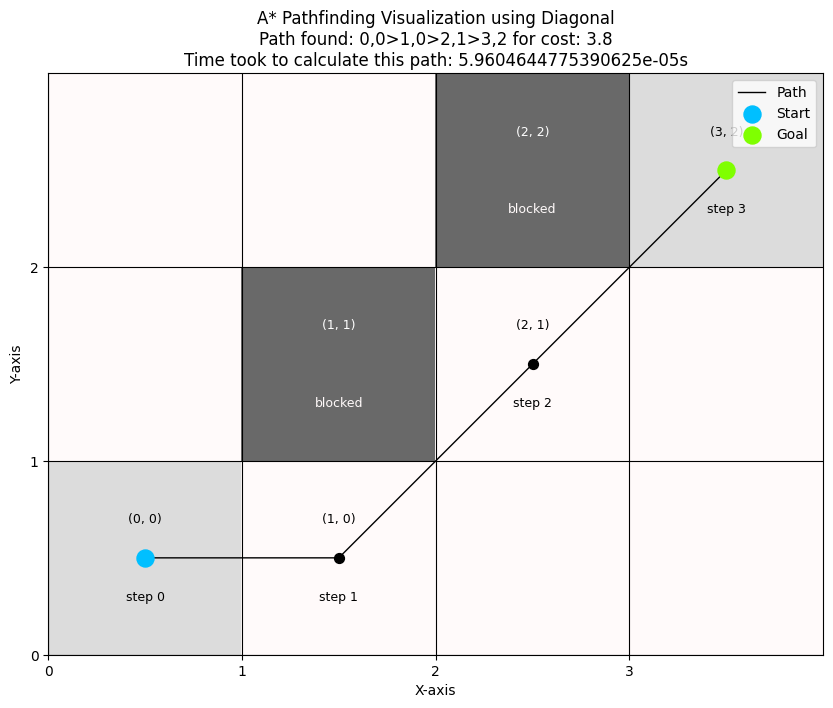

In [27]:
# This commented out section is used in colab
# Create a new cell in colab before the codes under this commented section and paste this code under there
# # # ## this is for mode 1 option 2 (optional for selecting environment 1)
# # # ## no need to run this cell. just go with option 1
# # from google.colab import files
# # uploaded = files.upload()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import time


def file_input():
    # ## for selecting option 2, upload the file before entering this option or the file has to exist in the same directory
    # ## option 2 is for all environment
    input_method = input("\n\t\"1\" for colab environment.\n\t\"2\" for any environment.\n\t\tSelect environment: ")
    if input_method == "1":
        from google.colab import files
        uploaded = files.upload()
        input_name = list(uploaded.keys())[0]
    if input_method == "2":
        input_name = input("\n\tEnter the input file name with its extension type: ")

    with open(input_name, "r") as file:
        grid_size_x = int(file.readline().strip())
        grid_size_y = int(file.readline().strip())
        if grid_size_x < 0 or grid_size_y < 0:
            return "Wrong parameter!!"

        number_of_blocked_obstacles = int(file.readline().strip())

        blocked_obstacles = []
        for _ in range(number_of_blocked_obstacles):
            obstacle = file.readline().strip()
            x, y = map(int, obstacle.split(","))
            if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
                return "Wrong parameter!!"
            blocked_obstacles.append((x, y))

        start_line = file.readline().strip()
        x, y = map(int, start_line.split(","))
        if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
            return "Wrong parameter!!"
        start = [x, y]

        goal_line = file.readline().strip()
        x, y = map(int, goal_line.split(","))
        if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
            return "Wrong parameter!!"
        goal = [x, y]
    return grid_size_x, grid_size_y, blocked_obstacles, start, goal


def manual_input():
    grid_size_x = int(input("\tEnter the size of the grid in horizontal(x) direction: "))
    grid_size_y = int(input("\tEnter the size of the grid in vertical(y) direction: "))
    if grid_size_x < 0 or grid_size_y < 0:
        return "Wrong parameter!!"

    number_of_blocked_obstacles = int(input("\tEnter the number of blocked obstacles: "))
    blocked_obstacles = []

    for i in range(number_of_blocked_obstacles):
        obstacle = input("\t\tEnter obstacle "+str(i)+" coordination: ")
        # blocked_obstacles.append(obstacle)    # ##this is string list
        x, y = map(int, obstacle.split(","))
        if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
            return "Wrong parameter!!"
        blocked_obstacles.append((int(x), int(y)))  # ##integer representation is implemented
    # print(blocked_obstacles)

    start = input("\t**Enter start node coordination: ")
    x, y = map(int, start.split(","))
    if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
        return "Wrong parameter!!"
    start = [x, y]

    goal = input("\t##Enter goal node coordination: ")
    x, y = map(int, goal.split(","))
    if x < 0 and x > grid_size_x or y < 0 and y > grid_size_y:
        return "Wrong parameter!!"
    goal = [x, y]
    return grid_size_x, grid_size_y, blocked_obstacles, start, goal


def calculate_open_grid(grid_size_x, grid_size_y, blocked_obstacles):
    open_grid = []
    for y in range(grid_size_y):
        for x in range(grid_size_x):
            if ((x), (y)) in blocked_obstacles:
                continue
            else:
                open_grid.append([int(x), int(y)])
    # print(open_grid)
    return open_grid
# print(calculate_open_grid(grid_size_x, grid_size_y, blocked_obstacles))


def calculate_heuristic_value_Manhattan(open_grid, goal_node):    # ##Manhattan distance
    heuristic = {}
    start_time = time.time()
    for value in open_grid:
        heuristic_value = sum(np.abs(value[i] - goal_node[i]) for i in range(len(goal_node)))
        heuristic[str(value[0])+","+str(value[1])] = int(heuristic_value)
    # print(heuristic)
    total_time = time.time() - start_time
    return heuristic, "Manhattan", total_time


def calculate_heuristic_value_Diagonal(open_grid, goal_node):
    heuristic = {}
    start_time = time.time()
    for value in open_grid:
        heuristic_value = max(abs(value[i]-goal_node[i]) for i in range(len(goal_node)))
        heuristic[str(value[0])+","+str(value[1])] = int(heuristic_value)
    # print(heuristic)
    total_time = time.time() - start_time
    return heuristic, "Diagonal", total_time


def calculate_adjacent_node(node, grid_size_x, grid_size_y, blocked_obstacles):
    adjacent_nodes = []
    # ##top level
    if ((node[0]-1) >= 0):
        if (((node[1]-1) >= 0) and (((node[0]-1), (node[1]-1)) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]-1), (node[1]-1)])
        if ((((node[0]-1), node[1]) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]-1), node[1]])
        if (((node[1]+1) <= (grid_size_y-1)) and (((node[0]-1), (node[1]+1)) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]-1), (node[1]+1)])

    # ##same level
    if (((node[1]-1) >= 0) and ((node[0], (node[1]-1)) not in blocked_obstacles)):
        adjacent_nodes.append([node[0], (node[1]-1)])
    if (((node[1]+1) <= (grid_size_y-1)) and ((node[0], (node[1]+1)) not in blocked_obstacles)):
        adjacent_nodes.append([node[0], (node[1]+1)])

    # ##bottom level
    if ((node[0]+1) <= (grid_size_x-1)):
        if (((node[1]-1) >= 0) and (((node[0]+1), (node[1]-1)) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]+1), (node[1]-1)])
        if ((((node[0]+1), node[1]) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]+1), node[1]])
        if (((node[1]+1) <= (grid_size_y-1)) and (((node[0]+1), (node[1]+1)) not in blocked_obstacles)):
            adjacent_nodes.append([(node[0]+1), (node[1]+1)])
    # print(adjacent_nodes)
    return adjacent_nodes


def get_adjacent_nodes(open_grid, grid_size_x, grid_size_y, blocked_obstacles):
    adjacent_nodes = {}
    for value in open_grid:
        adjacent_nodes[str(value[0])+","+str(value[1])] = calculate_adjacent_node(value, grid_size_x, grid_size_y, blocked_obstacles)
    return adjacent_nodes


def calculate_path_cost(start_node, values):
    path_cost_list = []
    # print("\n")
    for value in values:
        calculate_path_cost = np.sqrt(sum(np.power((start_node[i] - value[i]), 2) for i in range(len(start_node))))
        path_cost_list.append([f"{value[0]},{value[1]}", round(float(calculate_path_cost), 1)])
    return path_cost_list


def get_path_cost(adjacent_nodes):
    path_cost = {}
    for key, values in adjacent_nodes.items():
        x, y = map(int, key.split(","))
        start_node = [x, y]
        path_costs = calculate_path_cost(start_node, values)
        path_cost[f"{x},{y}"] = path_costs
    return path_cost


def node_iteration(start, goal, heuristic_value_dict, path_cost_dict):
    start_time = time.time()
    def smallest_node_for_f_of_n(open_node, close_node):
        filtered_open_node = {node: cost for node, cost in open_node.items() if node not in close_node}
        smallest_node = min(filtered_open_node, key=filtered_open_node.get) if filtered_open_node else None
        return smallest_node

    def request_heuristic_value(node, heuristic_value_dict):
        heuristic_value = heuristic_value_dict.get(node, float('inf'))
        return heuristic_value

    def request_path_cost_dictionary(node, path_cost_dict):
        dict_list = path_cost_dict[node]
        dict_list_into_dict = dict(dict_list)
        return dict_list_into_dict

    def modify_path_cost_heuristic(my_dict, s_node, d_node, g_of_n, h_of_n, close_node):
        current_f_of_n = g_of_n+h_of_n
        if d_node in my_dict:
            previous_f_of_n = my_dict[d_node][0]+my_dict[d_node][1]
            if current_f_of_n < previous_f_of_n:
                my_dict[d_node] = [g_of_n, h_of_n, my_dict[s_node][2]+">"+d_node]
            #     print("Modifying destination already exist: ")
            #     for key, value in path_cost_heuristic.items():
            #         print(f"{key}:{value}", "\n")
            # print("Not initilize")
        elif d_node in close_node:
            if current_f_of_n < close_node[d_node]:
                my_dict[d_node] = [g_of_n, h_of_n, my_dict[s_node][2]+">"+d_node]
            #     print("Modifying destination already exist: ")
            #     for key, value in path_cost_heuristic.items():
            #         print(f"{key}:{value}", "\n")
            # print("Not initilize")

        else:
            path = my_dict[s_node][2]
            my_dict[d_node] = [g_of_n, h_of_n, path+">"+d_node]
            # for key, value in path_cost_heuristic.items():
            #     print("Modifying new destination:")
            #     print(f"{key}:{value}", "\n")

    start = f"{start[0]},{start[1]}"
    goal = f"{goal[0]},{goal[1]}"

    node_heuristic_value = request_heuristic_value(start, heuristic_value_dict)
    open_node = {start: node_heuristic_value}
    close_node = {}
    path_cost_heuristic = {start: [0, node_heuristic_value, start]}
    # print("Initilize")
    # print(path_cost_heuristic)

    while open_node:
        source_node = smallest_node_for_f_of_n(open_node, close_node)
        if source_node == goal:
            path = path_cost_heuristic[goal][2]
            f_of_n = path_cost_heuristic[goal][0] + path_cost_heuristic[goal][1]
            total_time = time.time() - start_time
            print(f"Path found: {path} in {total_time}s")
            return path, total_time, f_of_n

        adjacent_path_cost_dict = request_path_cost_dictionary(source_node, path_cost_dict)
        for destination_node, current_path_cost in adjacent_path_cost_dict.items():
            h_of_n = request_heuristic_value(destination_node, heuristic_value_dict)
            previous_g_of_n = path_cost_heuristic[source_node][0]
            g_of_n = current_path_cost+previous_g_of_n
            f_of_n = h_of_n+g_of_n   # ##total estimation of cheapest cost. jana nai eitare ki bola jai?
            if destination_node not in open_node or f_of_n < open_node.get(destination_node, float('inf')):
                open_node[destination_node] = f_of_n
                modify_path_cost_heuristic(path_cost_heuristic, source_node, destination_node, g_of_n, h_of_n, close_node)

        close_node[source_node] = open_node[source_node]
        del open_node[source_node]
        del path_cost_heuristic[source_node]
    print("Goal not reachable.")
    return "Something went wrong!!!", None


def plot_path_grid(grid_size_x, grid_size_y, blocked_obstacles, start, goal, path, name, time_took, final_path_cost):
    plt.figure(figsize=(10, 8))

    # Create the grid
    grid = np.zeros((grid_size_x, grid_size_y))

    # Mark blocked obstacles
    for obstacle in blocked_obstacles:
        grid[obstacle] = 1  # Use 1 to represent blocked cells

    # Mark the start and goal positions
    grid[start[0], start[1]] = -1  # Start position
    grid[goal[0], goal[1]] = -2    # Goal position

    # Define a custom colormap
    cmap = ListedColormap(['gainsboro', 'gainsboro', 'snow', 'dimgray'])
    # Define the color mapping: -2 for goal, -1 for start, 1 for obstacles, and 0 for open cells.
    norm = plt.Normalize(-2, 1)

    # Plot the grid with specified colors
    plt.imshow(np.rot90(grid), cmap=cmap, norm=norm, extent=[0, grid_size_x, 0, grid_size_y])

    # Plot the path if it exists
    counter = 0
    if path:
        path_coordinates = [tuple(map(int, node.split(','))) for node in path.split('>')]
        # Increment each coordinate by +0.5 for correct alignment
        path_coordinates = [(x + 0.5, y + 0.5) for (x, y) in path_coordinates]
        path_x, path_y = zip(*path_coordinates)
        plt.plot(path_x, path_y, color='black', linewidth=1, label="Path", zorder=1)
        plt.scatter(path_x, path_y, color='black', s=50, zorder=2)  # Small dots on the path
        for x, y in path_coordinates:
            plt.text(x, y+0.2, f"({int(x)}, {int(y)})", color='black', fontsize=9, ha='center', va='center')
            plt.text(x, y-0.2, f"step {counter}", color='black', fontsize=9, ha='center', va='center')
            counter += 1

    for obstacle in blocked_obstacles:
        grid[obstacle] = 1  # Use 1 to represent blocked cells
        x, y = obstacle
        plt.text(x + 0.5, y + 0.7, f"{obstacle}", color='white', fontsize=9, ha='center', va='center')
        plt.text(x + 0.5, y + 0.3, "blocked", color='snow', fontsize=9, ha='center', va='center')

    # Add labels for start and goal
    plt.scatter(start[0] + 0.5, start[1] + 0.5, color='deepskyblue', s=150, label="Start", zorder=3)
    plt.scatter(goal[0] + 0.5, goal[1] + 0.5, color='chartreuse', s=150, label="Goal", zorder=3)

    plt.legend(loc="upper right")
    plt.xticks(np.arange(grid_size_x))
    plt.yticks(np.arange(grid_size_y))
    plt.grid(color='black')
    plt.title(f'A* Pathfinding Visualization using {name}\nPath found: {path} for cost: {final_path_cost}\nTime took to calculate this path: {time_took}ms')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


def plot_heuristic_grid(grid_size_x, grid_size_y, blocked_obstacles, start, goal, heuristic, name, time_took_to_calculate):
    plt.figure(figsize=(10, 8))

    grid = np.zeros((grid_size_x, grid_size_y))

    for obstacle in blocked_obstacles:
        grid[obstacle] = 1  # Use 1 to represent blocked cells

    grid[start[0], start[1]] = -1  # Start position
    grid[goal[0], goal[1]] = -2    # Goal position

    # Define a custom colormap
    cmap = ListedColormap(['gainsboro', 'gainsboro', 'snow', 'dimgray'])
    norm = plt.Normalize(-2, 1)
    plt.imshow(np.rot90(grid), cmap=cmap, norm=norm, extent=[0, grid_size_x, 0, grid_size_y])

    for key, value in heuristic.items():
        x, y = map(int, key.split(","))
        plt.text(x + 0.2, y + 0.9, key, color='black', fontsize=9, ha='left', va='top')
        plt.text(x + 0.2, y + 0.5, f"h({value})", color='black', fontsize=9, ha='left', va='center')

    plt.text(start[0] + 0.2, start[1] + 0.1, "Start", color='black', fontsize=9, ha='left', va='bottom')
    plt.text(goal[0] + 0.2, goal[1] + 0.1, "Goal", color='black', fontsize=9, ha='left', va='bottom')

    plt.xticks(np.arange(grid_size_x))
    plt.yticks(np.arange(grid_size_y))
    plt.grid(color='black')
    plt.title(f'{name} distance(Heuristic value)\nTime took to calculate heuristic: {time_took_to_calculate}ms')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


def plot_grid(grid_size_x, grid_size_y, blocked_obstacles, open_grid, start, goal, time_took_to_calculate):
    plt.figure(figsize=(10, 8))

    grid = np.zeros((grid_size_x, grid_size_y))

    for obstacle in blocked_obstacles:
        grid[obstacle] = 1  # Use 1 to represent blocked cells
        x, y = obstacle
        plt.text(x + 0.5, y + 0.5, obstacle, color='white', fontsize=9, ha='center', va='center')
        # plt.text(x + 0.2, y + 0.5, f"h({value})", color='black', fontsize=9, ha='left', va='center')

    for value in open_grid:
        x, y = value
        plt.text(x + 0.5, y + 0.5, value, color='black', fontsize=9, ha='center', va='center')

    grid[start[0], start[1]] = -1  # Start position
    grid[goal[0], goal[1]] = -2    # Goal position

    # Define a custom colormap
    cmap = ListedColormap(['gainsboro', 'gainsboro', 'snow', 'dimgray'])
    norm = plt.Normalize(-2, 1)
    plt.imshow(np.rot90(grid), cmap=cmap, norm=norm, extent=[0, grid_size_x, 0, grid_size_y])

    plt.text(start[0] + 0.2, start[1] + 0.1, "Start", color='black', fontsize=9, ha='left', va='bottom')
    plt.text(goal[0] + 0.2, goal[1] + 0.1, "Goal", color='black', fontsize=9, ha='left', va='bottom')

    plt.xticks(np.arange(grid_size_x))
    plt.yticks(np.arange(grid_size_y))
    plt.grid(color='black')
    plt.title(f'Given grid for open and close nodes(Coordinations).\nTime took to calculate open path: {time_took_to_calculate}ms')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


def main():
    mode = int(input("\n\t\"1\" for using file input mode.\n\t\"2\" for manual input using terminal mode.\n\t\tSelect: "))
    if mode == 1:
        grid_size_x, grid_size_y, blocked_obstacles, start, goal = file_input()
    elif mode == 2:
        grid_size_x, grid_size_y, blocked_obstacles, start, goal = manual_input()

    else:
        print("Selection is invalid.")
    start_time = time.time()
    open_grid = calculate_open_grid(grid_size_x, grid_size_y, blocked_obstacles)
    time_took_to_calculate = time.time() - start_time
    plot_grid(grid_size_x, grid_size_y, blocked_obstacles, open_grid, start, goal, time_took_to_calculate)
    adjacent_nodes = get_adjacent_nodes(open_grid, grid_size_x, grid_size_y, blocked_obstacles)
    path_cost = get_path_cost(adjacent_nodes)
    print(f"\nPath cost: \n{path_cost}\n\n")

    heuristic_value_dict = {}
    heuristic_value, name, time_it_took_to_calculate = calculate_heuristic_value_Manhattan(open_grid, goal)
    heuristic_value_dict[name] = [heuristic_value, time_it_took_to_calculate]
    heuristic_value, name, time_it_took_to_calculate = calculate_heuristic_value_Diagonal(open_grid, goal)
    heuristic_value_dict[name] = [heuristic_value, time_it_took_to_calculate]
    for name, value in heuristic_value_dict.items():
        heuristic_value = value[0]
        time_took_to_calculate_heuristic = value[1]
        plot_heuristic_grid(grid_size_x, grid_size_y, blocked_obstacles, start, goal, heuristic_value, name, time_took_to_calculate_heuristic)
        output, time_took_to_calculate_path, path_final_cost = node_iteration(start, goal, heuristic_value, path_cost)
        plot_path_grid(grid_size_x, grid_size_y, blocked_obstacles, start, goal, output, name, time_took_to_calculate_path, path_final_cost)


if __name__ == "__main__":
    main()

# input 1:
# 4
# 3
# 2
# 1,1
# 2,2
# 0,0
# 3,2

# input 2:
# 10
# 10
# 20
# 2,8
# 3,8
# 5,7
# 6,7
# 8,7
# 3,6
# 4,6
# 8,5
# 1,4
# 3,4
# 5,4
# 7,4
# 8,4
# 3,3
# 1,2
# 6,2
# 3,1
# 5,1
# 6,1
# 8,1
# 4,8
# 8,0

# input 3:
# 10
# 10
# 20
# 2,0
# 4,0
# 9,0
# 6,1
# 8,1
# 2,2
# 4,3
# 8,3
# 1,4
# 4,4
# 6,4
# 7,5
# 0,6
# 3,6
# 9,6
# 0,7
# 7,7
# 3,8
# 1,9
# 5,9
# 0,0
# 9,9

# ## Input format:
# number of tiles in x direction
# number of tiles in y direction
# number of blocked obstacles
# blocked obstacle Coordinations(x,y) for n numbers
# start Coordination(x,y)
# goal Coordination

# ## Input format:
# number of tiles in x direction
# number of tiles in y direction
# number of blocked obstacles
# blocked obstacle Coordinations for n numbers
# start Coordination
# goal Coordination
